In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [380]:
train = pd.read_csv('/users/monicalondon/Downloads/8855_12352_bundle_archive/housing_train.csv')
test = pd.read_csv('/users/monicalondon/Downloads/8855_12352_bundle_archive/housing_test.csv')

In [381]:
frames = [train, test]
data = pd.concat(frames)


In [382]:
# Drop ID column
data.drop(['Id'], axis=1, inplace=True)

In [383]:
# Drop alley column
data.drop(['Alley'], axis=1, inplace=True)

In [384]:
# Drop poolQC column
data.drop(['PoolQC'], axis=1, inplace=True)

In [385]:
# Drop MiscFeatures column
data.drop(['MiscFeature'], axis=1, inplace=True)

In [386]:
# Drop Fence column
data.drop(['Fence'], axis=1, inplace=True)

In [387]:
# Drop MiscVal column
data.drop(['MiscVal'], axis=1, inplace=True)

In [388]:
# Drop FireplaceQA column
data.drop(['FireplaceQu'], axis=1, inplace=True)

In [389]:
# Drop values with no sale price

In [390]:
data['SalePrice'].replace('', np.nan, inplace=True)

In [391]:
data.dropna(subset=['SalePrice'], inplace=True)

In [392]:
# Separate X and y
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

In [393]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### EDA

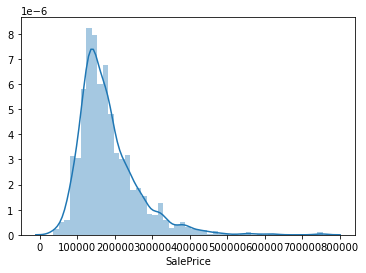

In [394]:
sns.distplot(data['SalePrice']);

We can see that the Sale Price is not normally distributed, so we will need to do a log transformation

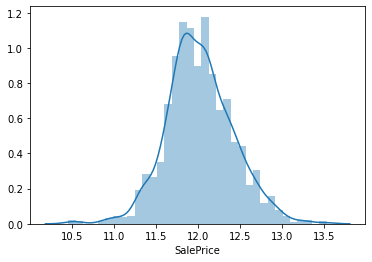

In [395]:
sns.distplot(np.log1p(data['SalePrice']))

### Missing Values

In [396]:
#check for missing values
data.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64

We have 259 missing values in LotFrontage. We can fill missing LotFrontage values based on mean LotArea/LotFrontage value.

In [397]:
# Fill missing LotFrontage values based on median LotArea/LotFrontage value
data['LotFrontage'] = data['LotFrontage'].fillna((data['LotArea']/data['LotFrontage']).median())

In [398]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [399]:
# Fill missing MasVnrType values with None (mode)
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [400]:
# Fill missing MasVnrArea values with 0
data['MasVnrArea'] = data['MasVnrArea'].fillna(0.0)

In [401]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [402]:
# Fill missing Electrical value with mode
data['Electrical'] = data['Electrical'].fillna('SBrkr')

In [403]:
data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [404]:
# Fill missing BsmtQual with None
data['BsmtQual'] = data['BsmtQual'].fillna('None')

In [405]:
# Fill missing BsmtCond with None
data['BsmtCond'] = data['BsmtCond'].fillna('None')

In [406]:
# Fill missing BsmtExposure with None
data['BsmtExposure'] = data['BsmtExposure'].fillna('None')

In [407]:
# Fill missing BsmtFinType1 with None
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')

In [408]:
# Fill missing BsmtFinType2 with None
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')

In [409]:
# Fill missing GarageType with None
data['GarageType'] = data['GarageType'].fillna('None')

In [410]:
# Fill missing GarageQual with None
data['GarageQual'] = data['GarageQual'].fillna('None')

In [411]:
# Fill missing GarageCond with None
data['GarageCond'] = data['GarageCond'].fillna('None')

In [412]:
# Fill missing GarageFinish with None
data['GarageFinish'] = data['GarageFinish'].fillna('None')

In [413]:
# Drop GarageYearBuilt column
data.drop(['GarageYrBlt'], axis=1, inplace=True)

In [414]:
data['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [415]:
# What percent of properties have been remodeled?
(data['YearRemodAdd'] == data['YearBuilt']).sum()/len(data)

0.5232876712328767

In [416]:
data['Fireplaces'].unique()

array([0, 1, 2, 3])

In [417]:
data['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [418]:
data['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [419]:
data['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738])

### Baseline Model

In [420]:
dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(X_train, y_train)
dummy_mean.score(X_test, y_test)

-0.0014293725084049136

### Feature Engineering

In [421]:
# Combine full and half bathrooms
data['Total_Bathrooms'] = data['FullBath'] + data['HalfBath']*.5

In [422]:
# Drop full & half bathrooms
data.drop(['FullBath'], axis=1, inplace=True)
data.drop(['HalfBath'], axis=1, inplace=True)

In [423]:
# Combine basement full and half bathrooms
data['Basement_Total_Bathrooms'] = data['BsmtFullBath'] + data['BsmtHalfBath']*.5

In [424]:
# Drop basement full & half bathrooms
data.drop(['BsmtFullBath'], axis=1, inplace=True)
data.drop(['BsmtHalfBath'], axis=1, inplace=True)

In [425]:
# Drop Pool Area - only 7 pools
data.drop(['PoolArea'], axis=1, inplace=True)

In [426]:
data['Utilities']

0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
         ...  
1455    AllPub
1456    AllPub
1457    AllPub
1458    AllPub
1459    AllPub
Name: Utilities, Length: 1460, dtype: object

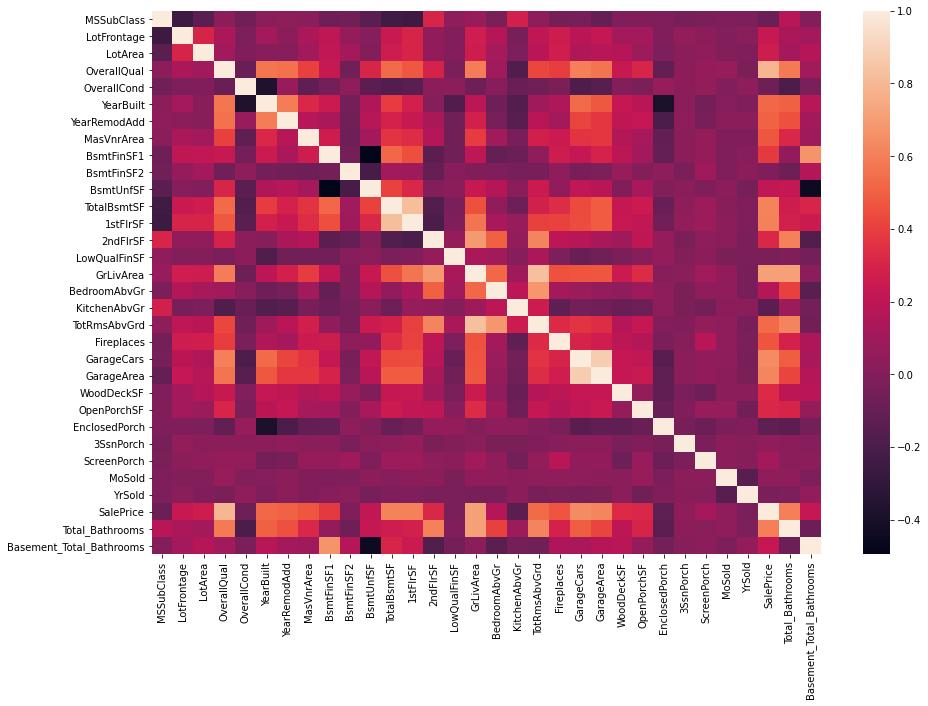

In [427]:
# Plot heatmap of feature correlation
plt.figure(figsize = (15,10))
sns.heatmap(data.corr())

We can see that overall quality is the highest correlating feature with Total Sale Price

In [428]:
# Change KitchenQual to numeric
data['KitchenQual'].unique()
data['KitchenQual'] = np.where((data.KitchenQual == 'Ex'), 5,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'Gd'), 4,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'TA'), 3,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'Fa'), 2,data.KitchenQual)

In [429]:
data['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [430]:
# Change ExterQual to numeric
data['ExterQual'] = np.where((data.ExterQual == 'Ex'), 5,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'Gd'), 4,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'TA'), 3,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'Fa'), 2,data.ExterQual)

In [431]:
# Change ExterCond to numeric
data['ExterCond'] = np.where((data.ExterCond == 'Ex'), 5,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Gd'), 4,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'TA'), 3,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Fa'), 2,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Po'), 1,data.ExterCond)

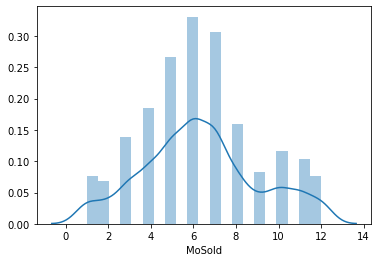

In [432]:
sns.distplot(data['MoSold'])

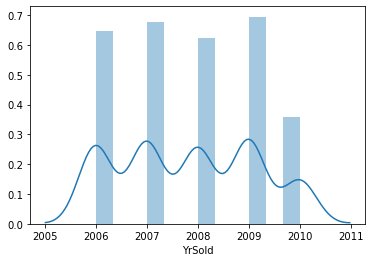

In [433]:
sns.distplot(data['YrSold'])

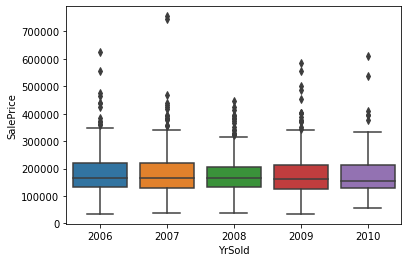

In [434]:
# Boxplot of sale prices by year sold
sns.boxplot(x='YrSold', y='SalePrice', data=data)

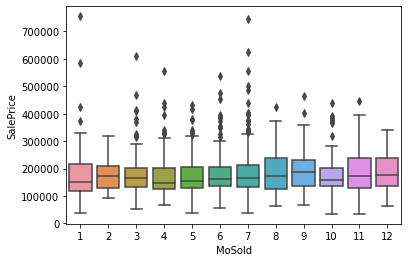

In [435]:
sns.boxplot(x='MoSold', y='SalePrice', data=data)

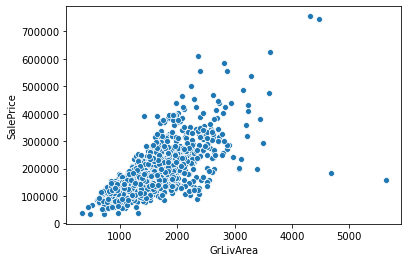

In [436]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data);

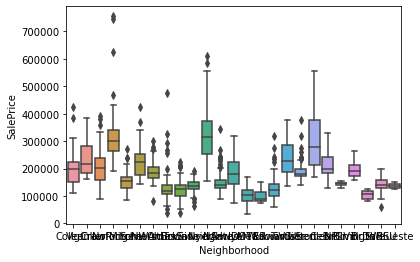

In [437]:
sns.boxplot(x='Neighborhood', y='SalePrice', data=data)

We can see that sale price appears to vary by neighborhood.

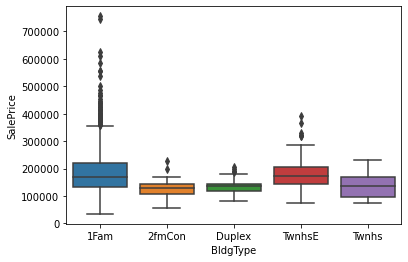

In [438]:
sns.boxplot(x='BldgType', y='SalePrice', data=data);

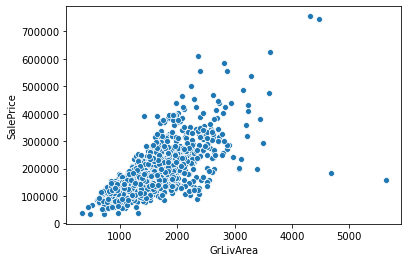

In [439]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data);

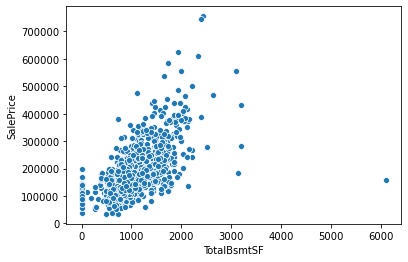

In [440]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=data)

In [441]:
# Convert neighborhood to categorical
neighborhood_cat = pd.get_dummies(data.Neighborhood, prefix='neigh')
data = pd.concat([data, pd.get_dummies(data['Neighborhood'], prefix='neigh', drop_first=True)], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,1,0,0,0,0,0,0,0,0,0


In [442]:
# Convert BldgType to categorical
data = pd.concat([data, pd.get_dummies(data['BldgType'], prefix='BldgType', drop_first=True)], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,0


### Baseline Model - Linear Regression & Random Forest
Based on domain knowledge, I am selecting the following features for my baseline model
1) Neighorhood
2) GrLivArea
3) OverallQual
4) LotArea
5) YearRemodAdd
6) BldgType
7) TotalBsmtSF

In [445]:
# Train test split
# Separate X and y
X = data[['neigh_Blueste', 'neigh_BrDale', 'neigh_BrkSide', 'neigh_ClearCr', 
          'neigh_CollgCr', 'neigh_Crawfor', 'neigh_Edwards', 'neigh_Gilbert', 'neigh_IDOTRR', 'neigh_MeadowV',
          'neigh_Mitchel', 'neigh_NAmes', 'neigh_NoRidge', 'neigh_NridgHt', 'neigh_OldTown', 'neigh_SWISU', 'neigh_Sawyer', 'neigh_SawyerW', 'neigh_Somerst', 
          'neigh_StoneBr', 'neigh_Timber', 'neigh_Veenker', 'BldgType_2fmCon', 'BldgType_Duplex', 
          'BldgType_Twnhs', 'BldgType_TwnhsE','GrLivArea', 'OverallQual', 'LotArea', 'YearRemodAdd', 'TotalBsmtSF']]
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [446]:
# Linear Baseline Model
model_one = LinearRegression()
print('Model got a average score of R2: {}'.format(
    cross_val_score(model_one, X_train, y_train, cv=10).mean()))

Model got a average score of R2: 0.7686851188142246


In [451]:
# Random Forest Baseline Model

In [454]:
rf = RandomForestRegressor(n_estimators=1000,
                           max_features='auto',
                           random_state=42,
                           oob_score=True)
rf.fit(X_train, y_train)
rf.oob_score_

0.8274651467196644

In [458]:
print('Model got a average score of R2: {}'.format(
    cross_val_score(rf, X_train, y_train, cv=10).mean()))

Model got a average score of R2: 0.8172656620317016


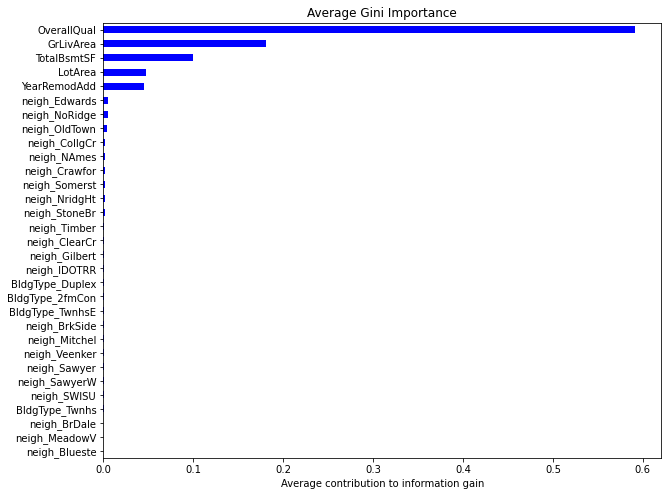

In [455]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_,
                           index=X.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

In [459]:
# Ridge Model


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 98 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MSSubClass                1460 non-null   int64  
 1   MSZoning                  1460 non-null   object 
 2   LotFrontage               1460 non-null   float64
 3   LotArea                   1460 non-null   int64  
 4   Street                    1460 non-null   object 
 5   LotShape                  1460 non-null   object 
 6   LandContour               1460 non-null   object 
 7   Utilities                 1460 non-null   object 
 8   LotConfig                 1460 non-null   object 
 9   LandSlope                 1460 non-null   object 
 10  Neighborhood              1460 non-null   object 
 11  Condition1                1460 non-null   object 
 12  Condition2                1460 non-null   object 
 13  BldgType                  1460 non-null   object 
 14  HouseSty